# Data Science Principles and Practises:

## Coursework Description:

We are given with a Protein localisation dataset which describes the
properties of proteins found in the bacteria **Escherichia coli**. The location of the
proteins within the cell is also known with the data provided. 

### Dataset Description:

* Each row in the dataset corresponds to a single
protein. 
* The columns in the dataset are:
  * **X1 to X5 - Features of the proteins**
  * **C – Class** which describes the location of the protein.

* 0 indicates proteins
located in the inner membrane, whereas 1 indicates proteins in the perisplasm.

* Column "C" is considered as the target variable here.

### Goal:

The Goal is to develop a **Naive Bayes** and a **Logistic Regression** model to accurately determine
the location of a protein within the cell based on the features. We have to compare the results and conclude which model performs better.



# Importing Python Libraries:


Firstly, I have imported all the necessary Python libraries to perform this task.

* **Pandas** for work related to data cleaning, transformation and analysis.
* **NumPy** for handling arrays and numerical operations.
* **Matplotlib.pyplot** for visualising the data.
* **Seaborn** to enhance the visualisation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Python Functions:

I have imported all the necessary python functions.

* **train_test_split** for data splitting into train dataset and test dataset.
* **GaussianNB** for importing Gaussian Naive Bayes classifier.
* **LogisticRegression** for importing Logistic Regression classifier.
* **accuracy_score, precision_recall_fscore_support, confusion_matrix** for computing Accuracy, Precision, Recall, F1 score, Confusion matrix.
* **GridSearchCV** for performing Hyper parameter tuning.
* **classification_report** to obtain classification report.
* **roc_curve, auc** to compute and evaluate ROC and AUC.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# Importing Data:

In [4]:
#To import our file "ecoli.csv" using its path
#Considering the dataframe as Dataset
Dataset = pd.read_csv('/Users/wilson/Downloads/ecoli.csv')

In [5]:
#Viewing our dataset
Dataset

,X1,X2,X3,X4,X5,C
0,-0.007564,0.222171,0.158978,1.159728,0.267387,0
1,0.171858,-0.041690,0.250635,0.165851,0.461043,0
2,0.736046,0.343963,0.749114,0.561858,0.712554,0
3,0.000639,-0.175082,0.070584,0.317284,0.582597,0
4,0.571760,-0.244216,0.234515,0.902095,0.594026,0
...,...,...,...,...,...,...
124,0.648946,0.946382,0.893618,0.539939,0.532365,1
125,0.768015,0.955685,0.495043,0.100583,0.836665,1
126,0.649908,0.845137,0.406619,0.654427,1.003261,1
127,0.221111,0.787071,0.318218,0.867372,0.682562,1


# Data Understanding:

Data understanding involves gathering the information about the dataset, finding its dimensions and descriptive statistics and mainly the Correlation between the variables.

### Data Information:

In [6]:
#To find the information about our dataframe
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      129 non-null    float64
 1   X2      129 non-null    float64
 2   X3      129 non-null    float64
 3   X4      129 non-null    float64
 4   X5      129 non-null    float64
 5   C       129 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.2 KB


In [7]:
#To find dimensions of our dataset
Dataset.shape

(129, 6)

In [8]:
#To view the columns of our dataset
Dataset.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'C'], dtype='object')

### Descriptive Statistics:

In [9]:
#To obtain summary statistics for each column in our dataset
Dataset.describe()

,X1,X2,X3,X4,X5,C
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.539102,0.597149,0.521040,0.686822,0.565779,0.403101
std,0.478155,0.433768,0.378367,0.438045,0.412171,0.492433
min,-0.430791,-0.281866,-0.263064,-0.600203,-0.484916,0.000000
25%,0.180917,0.284631,0.250635,0.416989,0.267387,0.000000
50%,0.559401,0.535186,0.495043,0.716888,0.568919,0.000000
75%,0.826496,0.864219,0.793372,0.962953,0.836665,1.000000
max,2.044694,1.711213,1.486272,1.743930,1.848438,1.000000


# Visualization of Data:

### Line plot Graph:

Using **plot.line()** function, I have plotted a graph with all the attributes of the dataset and it is differentiated by a unique color for better understanding. 

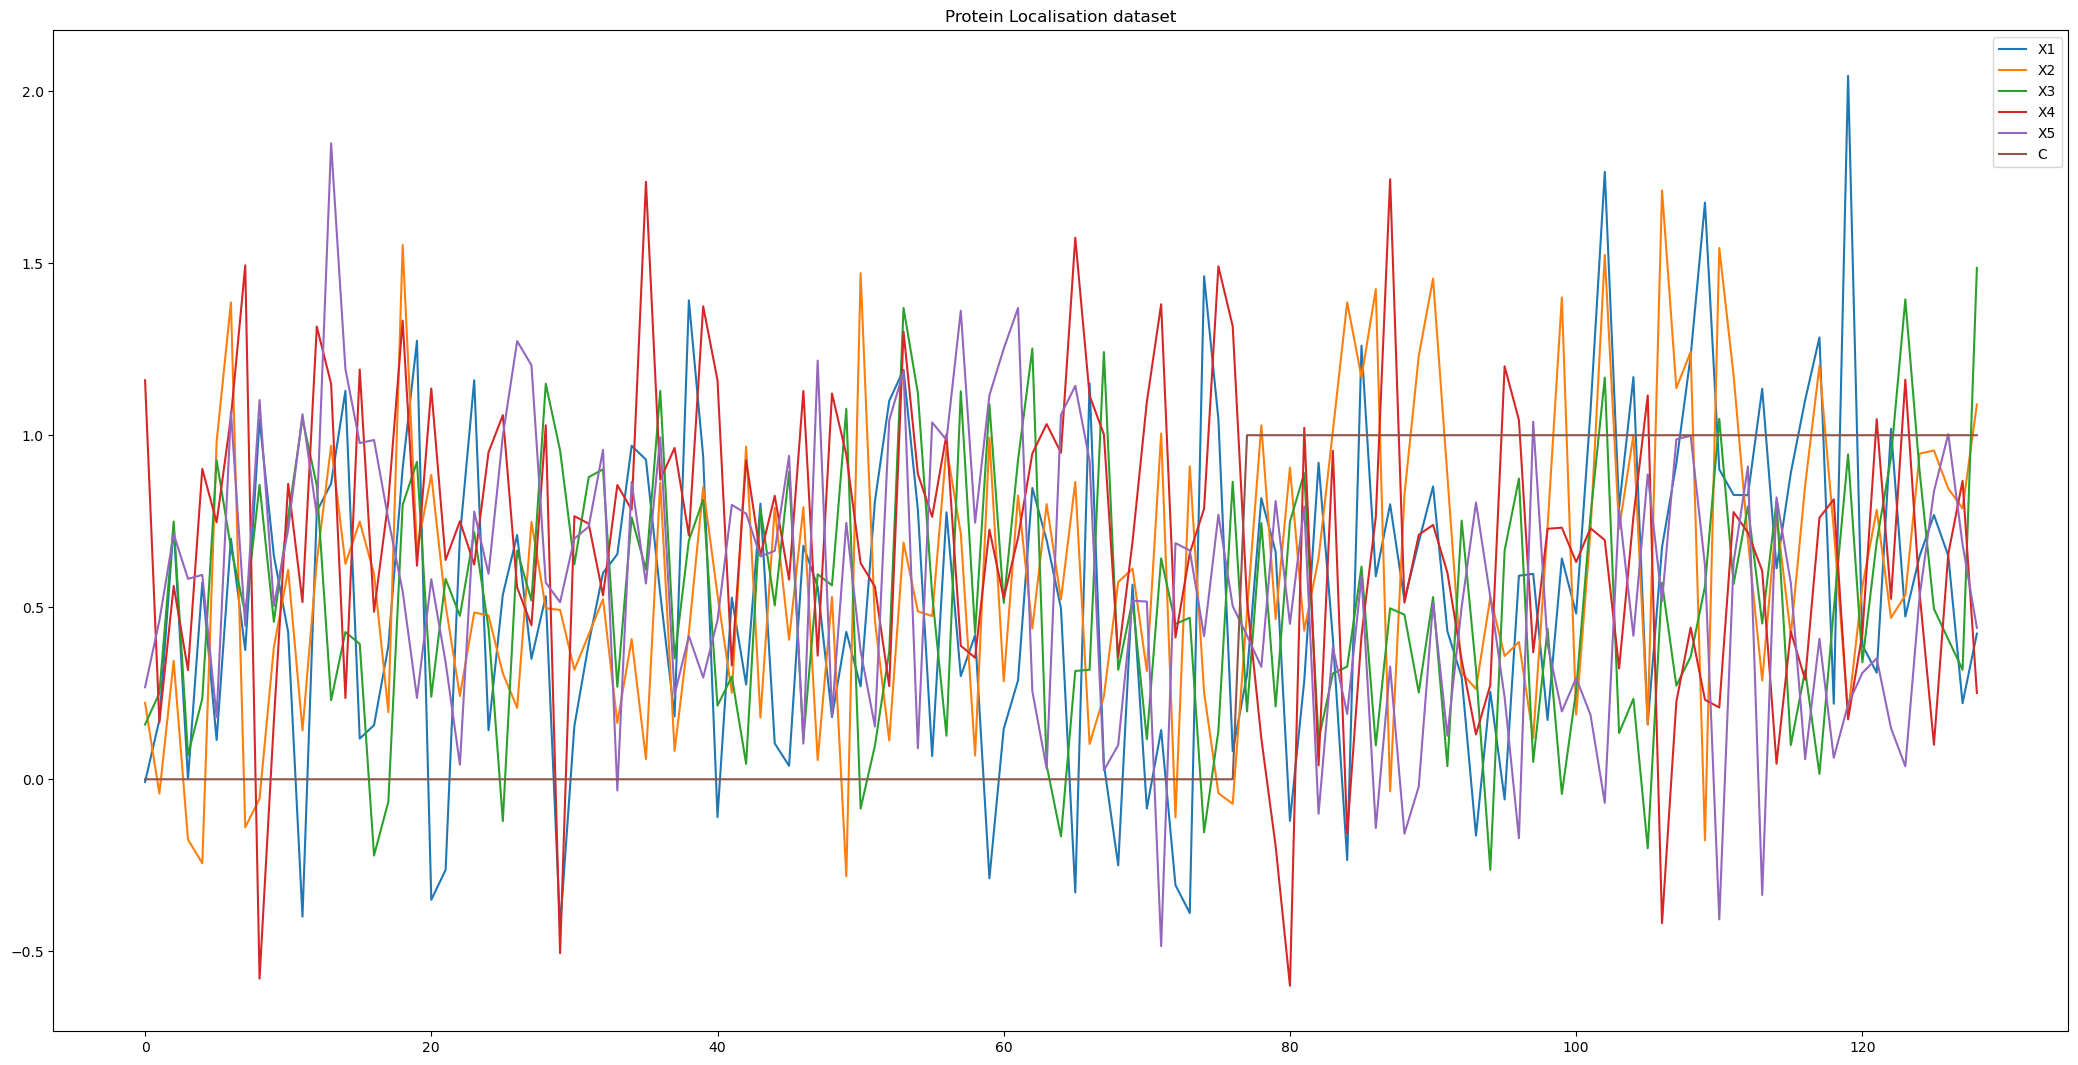

In [10]:
#To create a line plot
Dataset.plot.line(title="Protein Localisation dataset", figsize=(26,13));

### Correlation between the variables:

Correlation defines the linear relationship between our attributes. It ranges from **-1 to +1**.
* +1 shows a perfect positive linear relationship
* -1 shows a perfect negative linear relationship
* 0 indicates there is no linear relationship between the attributes.

Here we have used **Pearson Correlation** which is considered to be the default method and is one of the most widely used and understood methods for measuring linear relationships.

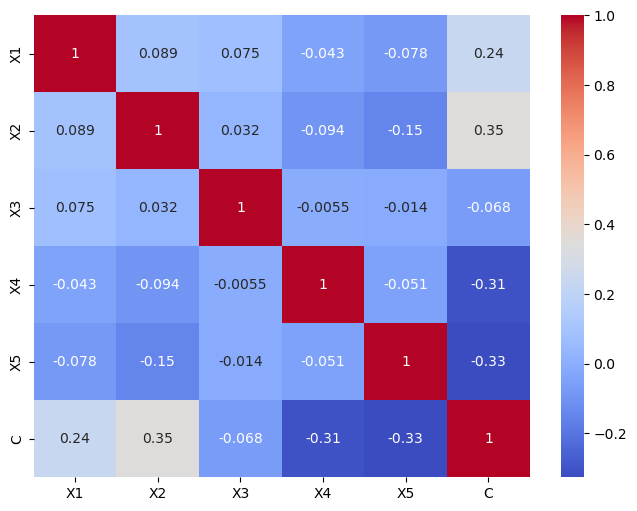

In [11]:
#To Compute the correlation between the variables using the most common method (Pearson correlation)
correlation_matrix = Dataset.corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Pre-processing:

Data Pre-processing involves checking for Null/Missing values and Duplicate values, Balance and Outliers check.

### Checking for Null values:

In [12]:
#To check if there is any null values
Dataset.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
C     0
dtype: int64

### Checking for Duplicate values:

In [13]:
#To check if there is any duplicate values
Duplicates = Dataset.duplicated().sum()
print(f'Number of duplicate values: {Duplicates}')

Number of duplicate values: 0


### Balance check:

0    77
1    52
Name: C, dtype: int64


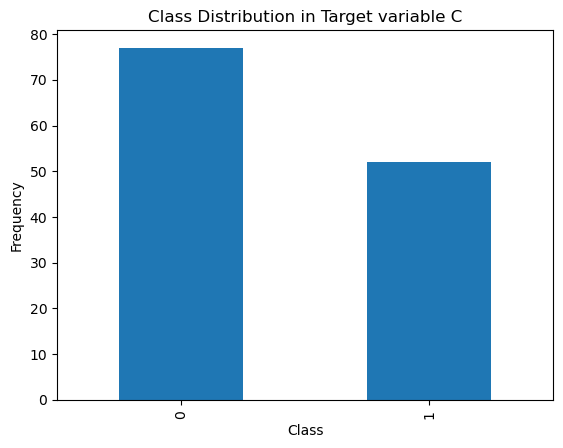

In [14]:
#To check if the data is balanced or not and plotting the result
Balance_check = Dataset['C'].value_counts()
print(Balance_check)
Balance_check.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Target variable C')
plt.show()

In [15]:
class_counts = Dataset['C'].value_counts()
total_counts = len(Dataset)

#To Calculate the Imbalance percentage
class_percentages = class_counts / total_counts * 100
print(class_percentages)

0    59.689922
1    40.310078
Name: C, dtype: float64


### Checking for outliers:

In [16]:
Q1 = Dataset['C'].quantile(0.25)
Q3 = Dataset['C'].quantile(0.75)
IQR = Q3 - Q1

#Defining limits for outliers in column 'C'
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#Identifying if there is any outliers in column 'C'
Outliers_check = Dataset[(Dataset['C'] < lower_limit) | (Dataset['C'] > upper_limit)]
print(f'Number of outliers in column C: {len(Outliers_check)}')

Number of outliers in column C: 0


# Data splitting:

Here we are splitting the dataset into **training** dataset and **test** dataset to make sure that our model is trained, tuned, and evaluated in a reliable manner to get better model performance and more accurate predictions on new data.
* A -> Columns {X1,X2,X3,X4,X5}
* B -> Column {C}

In [17]:
# A contains the features
A = Dataset.drop('C', axis=1)

# B contains the target variable "C"
B = Dataset['C']

#To split the feature dataset A and the target dataset B into four subsets: A_train, A_test, B_train, and B_test.
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [18]:
A.head()

,X1,X2,X3,X4,X5
0,-0.007564,0.222171,0.158978,1.159728,0.267387
1,0.171858,-0.041690,0.250635,0.165851,0.461043
2,0.736046,0.343963,0.749114,0.561858,0.712554
3,0.000639,-0.175082,0.070584,0.317284,0.582597
4,0.571760,-0.244216,0.234515,0.902095,0.594026


In [19]:
B.head(5)

0    0
1    0
2    0
3    0
4    0
Name: C, dtype: int64

# Naive Bayes:

The Naive Bayes classifier is based on **Bayes' Theorem**. It is easy to implement and understand. It can perform well even with a relatively small amount of training data.

Conditional probability can be calculated using the Bayes theorem for continuous variables and its expressed as,

**P(A|B)=(P(B|A).P(A))/P(B)** Where,
* **P(A)** - the probability of locating the protein.
* **P(B)** - the probability of observing certain environmental conditions or factors present in the cell.
* **P(A|B)** - the probability of locating the protein given the observed environmental conditions or factors.
* **P(B|A)** - the probability of observing these specific environmental conditions or factors when the protein is present.

**Why Gaussian Naive Bayes?**

As the dataset consists of continuous numerical features (X1, X2, X3, X4, X5), Gaussian Naive Bayes is well-suited for this kind of datasets. Also The dataset appears to be used for a binary classification problem (as Target variable 'C' has binary data), Gaussian NB is known to perform well in binary classification tasks.

### Hyper Parameter Tuning:

Hyperparameter Tuning is to optimize our model's performance. Tuning these hyperparameters is essential for achieving the best model performance and improving our model's ability to provide better results. 

In [20]:
#To create an instance of a Gaussian Naive Bayes classifier
GaussianNaiveBayes = GaussianNB()

# To perform a grid search to find the optimal value for the 'var_smoothing' hyperparameter of the Gaussian NB classifier by testing a range of values and selecting the one that results in the best accuracy score. 
param_grid = {                                                  #To Specify the parameter and its range.         
    'var_smoothing': np.logspace(0,-9, num=100)                 #To generate 100 values between 10^0 and 10^-9. This creates a wide range of values for the var_smoothing parameter.
}
grid_search = GridSearchCV(GaussianNaiveBayes, param_grid, cv=5, scoring='accuracy', verbose=1)     #GridSearchCV - To determine which parameter tune gives the best performance.
                                                                                                    #cv=5 means the data is split into 5 parts. 
                                                                                                    #scoring is how you measure which setting is best.

grid_search.fit(A_train, B_train)

#To display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score achieved:", grid_search.best_score_)

#To use the best estimator found during the hyperparameter tuning process.
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 0.03511191734215131}
Best Score achieved: 0.7666666666666666


### Model Training:

In [21]:
#To create an instance of a Gaussian Naive Bayes classifier
GaussianNaiveBayes = GaussianNB()

#To train NB model on our training dataset
GaussianNaiveBayes.fit(A_train, B_train)

#To make a prediction on our test dataset
GaussianNaiveBayes_predictions = GaussianNaiveBayes.predict(A_test)

### Accuracy and other metrics:

In [22]:
#To find the accuracy of NB model's predictions
Accuracy = accuracy_score(B_test, GaussianNaiveBayes_predictions)
print(f"Accuracy: {Accuracy}")

#To find Precision, Recall, and F1 Score values
Precision, Recall, F1_score, _ = precision_recall_fscore_support(B_test, GaussianNaiveBayes_predictions, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"F1 Score: {F1_score}")

#To display the classification rept
NB_report = classification_report(B_test, GaussianNaiveBayes_predictions)
print("Naive Bayes Class Rept:\n", NB_report)

Accuracy: 0.6153846153846154
Precision: 0.6
Recall: 0.2727272727272727
F1 Score: 0.37499999999999994
Naive Bayes Class Rept:
               precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.60      0.27      0.37        11

    accuracy                           0.62        26
   macro avg       0.61      0.57      0.55        26
weighted avg       0.61      0.62      0.58        26



In [23]:
print("Train data accuracy:",GaussianNaiveBayes.score(A_train, B_train))
print("Test data accuracy:",GaussianNaiveBayes.score(A_test, B_test))

Train data accuracy: 0.8058252427184466
Test data accuracy: 0.6153846153846154


# Logistic Regression:

Logistic Regression is a statistical method widely used to solve **binary classification** problems. In this dataset, we are using logistic regression classifier to predict the location of protein in E. coli, based on its features X1, X2, X3, X4, and X5. The formula looks like this:

**P(C=1|X) = 1/(1 + e^-(D0 + D1 * X1 + D2 * X2 + D3 * X3 + D4 * X4 + D5 * X5))**
Where,

* P(C=1 | X) is the probability of locating the protein based on its features.
* D1,D2,D3,D4,D5 are model coefficients
* X1,X2,X3,X4,X5 are features

**Why Logistic Regression?**

In our dataset, it is observed that our target variable 'C' is binary. This is ideal for Logistic Regression and also it can perform well with small to medium-sized datasets. 

### Hyper parameter tuning:

Hyperparameter Tuning is to optimize our model's performance. Tuning these hyperparameters is essential for achieving the best model performance and improving our model's ability to provide better results.

In [24]:
# To create an instance of a logistic regression classifier
LogisticRegressionModel = LogisticRegression()

# To perform a grid search to find the optimal value for the 'var_smoothing' hyperparameter of the Logistic Regression classifier by testing a range of values and selecting the one that results in the best accuracy score. 
param_grid = {                                             #To Specify the parameter and its range.
    'C': [0.1, 1, 10, 100],                                #C is a parameter to specify the regularization strength that is [0.1, 1, 10, 100]
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],         #solver is a parameter to specify the algorithm used for optimization of the model.
}
grid_search = GridSearchCV(LogisticRegressionModel, param_grid, cv=5, scoring='accuracy', verbose=1)     #GridSearchCV - To determine which parameter tune gives the best performance.
                                                                                                         #cv=5 means the data is split into 5 parts. 
                                                                                                         #scoring is how you measure which setting is best. 

grid_search.fit(A_train, B_train)

#To display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score achieved:", grid_search.best_score_)

#To use the best estimator found during the hyperparameter tuning process.
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Score achieved: 0.7566666666666666


### Model Training:

In [25]:
#To create an instance of a logistic regression classifier
LogisticRegressionmodel = LogisticRegression(max_iter=1000)

#To train LR model on our training dataset
LogisticRegressionmodel.fit(A_train, B_train)

#To make a prediction on our test dataset
LogisticRegressionmodel_predictions = LogisticRegressionmodel.predict(A_test)

### Accuracy and other metrics:


In [26]:
#To find the accuracy of the LR model's predictions
Accuracy = accuracy_score(B_test, LogisticRegressionmodel_predictions)
print(f"Accuracy: {Accuracy}")

#To find Precision, Recall, and F1 Score values
Precision1, Recall1, F1_score1, _ = precision_recall_fscore_support(B_test, LogisticRegressionmodel_predictions, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Precision: {Precision1}")
print(f"Recall: {Recall1}")
print(f"F1 Score: {F1_score1}")

#To display the classification rept
LR_report = classification_report(B_test, LogisticRegressionmodel_predictions)
print("Logistic Regression Class Rept:\n", LR_report)

Accuracy: 0.6923076923076923
Precision: 0.7142857142857143
Recall: 0.45454545454545453
F1 Score: 0.5555555555555556
Logistic Regression Class Rept:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.71      0.45      0.56        11

    accuracy                           0.69        26
   macro avg       0.70      0.66      0.66        26
weighted avg       0.70      0.69      0.68        26



In [27]:
print("Train data accuracy:",LogisticRegressionmodel.score(A_train, B_train))
print("Test data accuracy:",LogisticRegressionmodel.score(A_test, B_test))

Train data accuracy: 0.7766990291262136
Test data accuracy: 0.6923076923076923


## Accuracy Comparison:

Accuracy is the most widely used metric to evaluate the performance of a classification model. It's expressed as 

* **Accuracy score = Total Number of Predictions / Total Number of Correct Predictions**

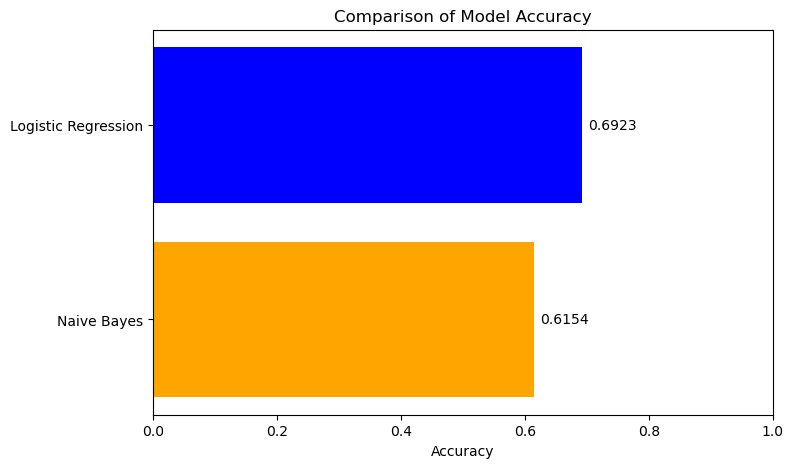

In [28]:
#Model names
Models = ['Logistic Regression', 'Naive Bayes']

#Accuracy scores for each model
accuracy_scores = [0.6923, 0.6154] 

#To create a horizontal bar chart to compare the model's accuracy
plt.figure(figsize=(8, 5))
bars = plt.barh(Models, accuracy_scores, color=['blue', 'orange'])  # Customize colors as needed

#To Add numerical values on top of each bar
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{score:.4f}', va='center')

plt.xlim(0, 1)                                            #Setting the x-axis limits (0 to 1 for accuracy)
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.gca().invert_yaxis()                                  #Inverting the y-axis to display the highest accuracy at the top
plt.show()

## Model Performance Evaluation:

Model performance evaluation that we've done is to ensure how well our Naive Bayes and Logistics Regression models perform on our given dataset. It means analyzing our models ability to make predictions, classifications accurately and effectively.

**Precision:** 
* It is a measure of correctly predicted positive observations to the total number of positive predictions.
  * **Precision score = True Positives / True Positives + False Positives**

​**Recall:**
* It is a measure of correctly predicted positive observations to the total number of actual positives.
  * **Recall score = True Positives / True Positives + False Negatives**

**F1 Score:**
* It is a weighted average of Precision score and Recall score.
  * **F1 Score = 2 × Precision score × Recall score / Precision score + Recall score**

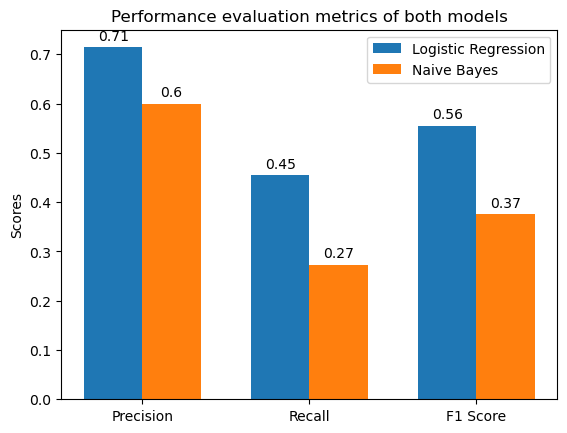

In [29]:
#To Define labels and metrics
Labels = ['Precision', 'Recall', 'F1 Score']
LR_metrics = [Precision1, Recall1, F1_score1]
NB_metrics = [Precision, Recall, F1_score]

#To Set positions of the bars
x = np.arange(len(Labels))            #To set the label locations
width = 0.35                          #To set the width of the bars

#To Create a plot
fig, ax = plt.subplots()

#To create two set of bars
rects1 = ax.bar(x - width/2, LR_metrics, width, label='Logistic Regression') #LR_metrics defines the performance metrics of LR model
rects2 = ax.bar(x + width/2, NB_metrics, width, label='Naive Bayes')         #NB_metrics defines the performance metrics of NB model

#To define x axis and y axis labels and title
ax.set_ylabel('Scores')
ax.set_title('Performance evaluation metrics of both models')
ax.set_xticks(x)
ax.set_xticklabels(Labels)
ax.legend()

#Function using to add labels on each bar
def autolabel(rects):                                                  #To disply the exact value of each metric on top of its corresponding bar
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),                     #To place a text label above the bar.
                    xy=(rect.get_x() + rect.get_width() / 2, height),  #To determine where to place the label.
                    xytext=(0, 3),           
                    textcoords="offset points",
                    ha='center', va='bottom')                          #To align the text

#To label the bars
autolabel(rects1)
autolabel(rects2)

#To visualize the plot
plt.show()

## Confusion Matrix Comparison:

A Confusion matrix is used to portray the performance of our model. It helps to demonstrate the performance of our algorithm.

Components:

* **True Positives**: Correctly predicted positive.
* **True Negatives**: Correctly predicted negative.
* **False Positives**: Wrongly predicted positive.
* **False Negatives**: Wrongly predicted negative.

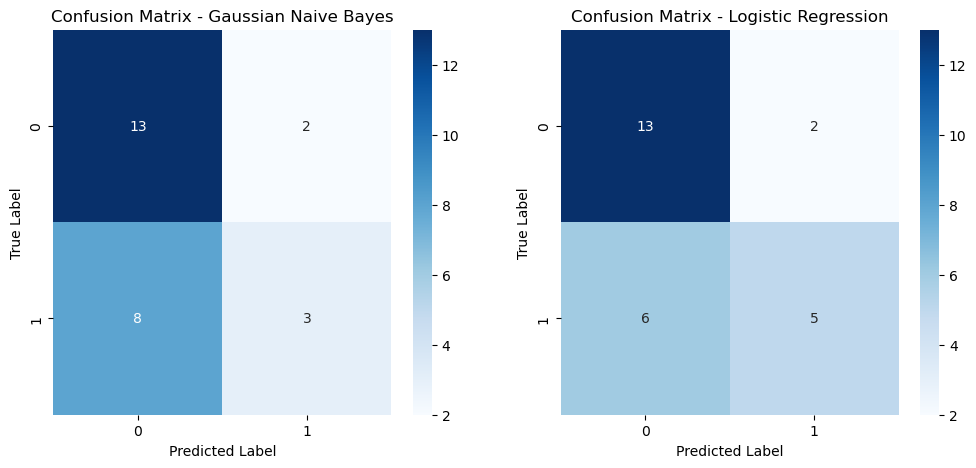

In [30]:
#Confusion Matrix for Gaussian Naive Bayes
ConfusionMatrix_GaussianNaiveBayes = confusion_matrix(B_test, GaussianNaiveBayes_predictions)

#Confusion Matrix for Logistic Regression
ConfusionMatrix_LogisticRegression = confusion_matrix(B_test, LogisticRegressionmodel_predictions)

#To plot both confusion matrices side by side
plt.figure(figsize=(12, 5))

#To plot Gaussian Naive Bayes Confusion Matrix
plt.subplot(1, 2, 1)                                                                 
sns.heatmap(ConfusionMatrix_GaussianNaiveBayes, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#To plot Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)                                                                 
sns.heatmap(ConfusionMatrix_LogisticRegression, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#To show the plot
plt.show()

### ROC & AUC Comparison:

ROC - **Receiver Operating Characteristic**  & AUC - **Area Under the Curve**

The ROC curve is used to evaluate and compare the performance of our models. It plots two parameters:

* **True Positive Rate** on the Y-axis.
  * The ratio of actual positives correctly identified by the model.
* **False Positive Rate** on the X-axis.
  * The ratio of actual negatives incorrectly identified as positives by the model.

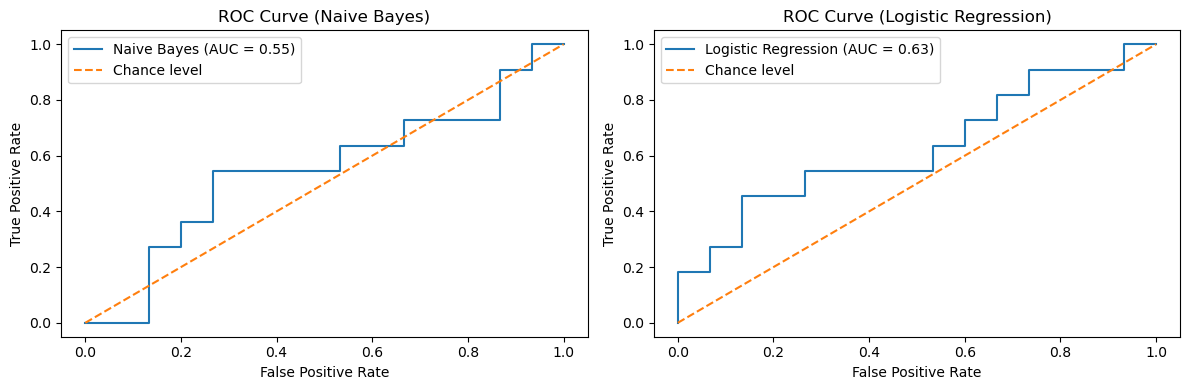

In [31]:
#Probability predictions for Naive Bayes
NB_probs = GaussianNaiveBayes.predict_proba(A_test)[:, 1]

#To Compute ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(B_test, NB_probs)
auc_nb = auc(fpr_nb, tpr_nb)

#Probability predictions for Logistic Regression
LR_probs = LogisticRegressionmodel.predict_proba(A_test)[:, 1]

#To Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(B_test, LR_probs)
auc_lr = auc(fpr_lr, tpr_lr)

#To create a figure with subplots side by side
plt.figure(figsize=(12, 4))

#Subplotting for Naive Bayes
plt.subplot(1, 2, 1)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Chance level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend()

#Subplotting for Logistic Regression
plt.subplot(1, 2, 2)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Chance level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()

#To Adjust layout and display the subplots
plt.tight_layout()
plt.show()

# Conclusion:

| Metric         | Naive Bayes | Logistic Regression |
|----------------|-------------|---------------------|
| Accuracy       | 0.6154      | 0.6923              |
| Precision      | 0.6000      | 0.7143              |
| Recall         | 0.2727      | 0.4545              |
| F1 Score       | 0.3750      | 0.5556              |



It is observed that the Accuracy, Precision, Recall and F1 scores are comparitively higher in Logistic Regression model than Naive Bayes model. Logistic Regression model provides a good balance between correctly identifying true positives and minimizing false positives.

Based on this analysis, the **Logistic Regression** model proves to be a better choice for this given dataset, as it consistently outperformed Naive Bayes in multiple metrics.  
